In [56]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [57]:
# Load the data
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 1. Clean the data by handling missing values, duplicates, and outliers

In [58]:
# Check for missing values
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [59]:
# Handle missing values
df = df.dropna()

In [60]:
# Check for duplicates
print( "Duplicates:" ,df.duplicated().sum())

Duplicates: 0


In [61]:
# Remove duplicates
df = df.drop_duplicates()

In [62]:
# Handle outliers using IQR method
for col in df.columns:
    if df[col].dtype != 'object':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# 2. Standardize data formats and units to ensure consistency

In [63]:
# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# 3. Perform data transformation, such as log scaling or normalization, for improved model performance

In [64]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [65]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_heart_disease_uci.csv'
df_scaled.to_csv(cleaned_file_path, index=False)

In [66]:
print("Data cleaning and preprocessing complete. Cleaned data saved to:", cleaned_file_path)

Data cleaning and preprocessing complete. Cleaned data saved to: cleaned_heart_disease_uci.csv


In [67]:
# Load the data
df = pd.read_csv('cleaned_heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,-1.661310,1.043902,0.728149,0.0,1.840504,1.008370,-0.226973,2.619555,-1.101934,-0.179366,-0.604375,1.547301,-2.471829,-0.631285,-2.244407,-0.655189
1,-1.639082,1.482832,0.728149,0.0,-1.060198,-0.606609,-0.318243,-0.381744,-1.101934,-1.180307,1.654601,1.860795,-0.814249,2.431119,1.372022,0.767507
2,-1.627967,-1.809142,0.728149,0.0,0.873603,0.039383,0.160923,-0.381744,0.876341,1.584195,-0.604375,2.801275,-2.471829,-0.631285,-0.436192,-0.655189
3,-1.616853,-1.370212,-1.373345,0.0,-0.093297,0.039383,-0.888678,-0.381744,-1.101934,0.869237,-0.604375,0.606821,0.843330,-0.631285,-0.436192,-0.655189
4,-1.605739,0.275775,0.728149,0.0,-0.093297,-0.606609,-0.158521,-0.381744,0.876341,1.155220,-0.604375,-0.020166,0.843330,-0.631285,-0.436192,-0.655189


In [68]:
# Check for missing values
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


# Data Visualization

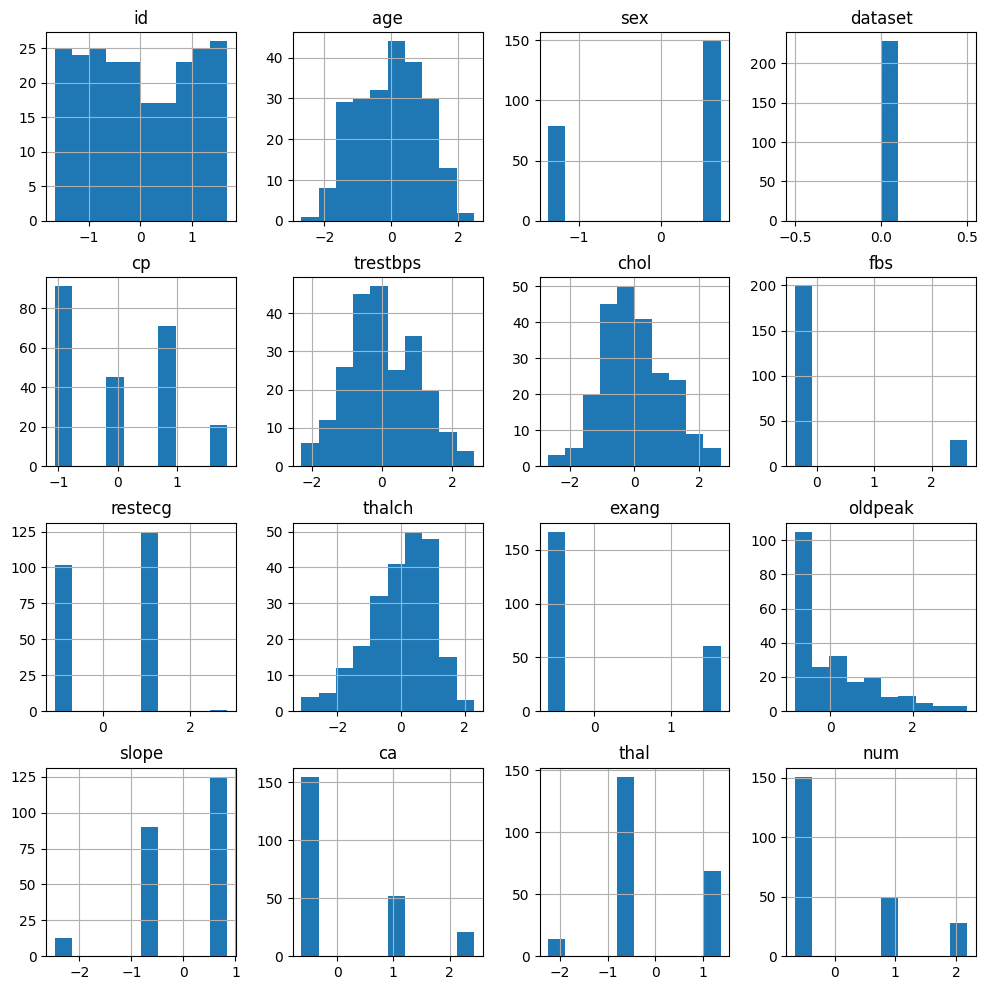

In [69]:
# 1. Histograms
df.hist(figsize=(12, 12))
plt.show()

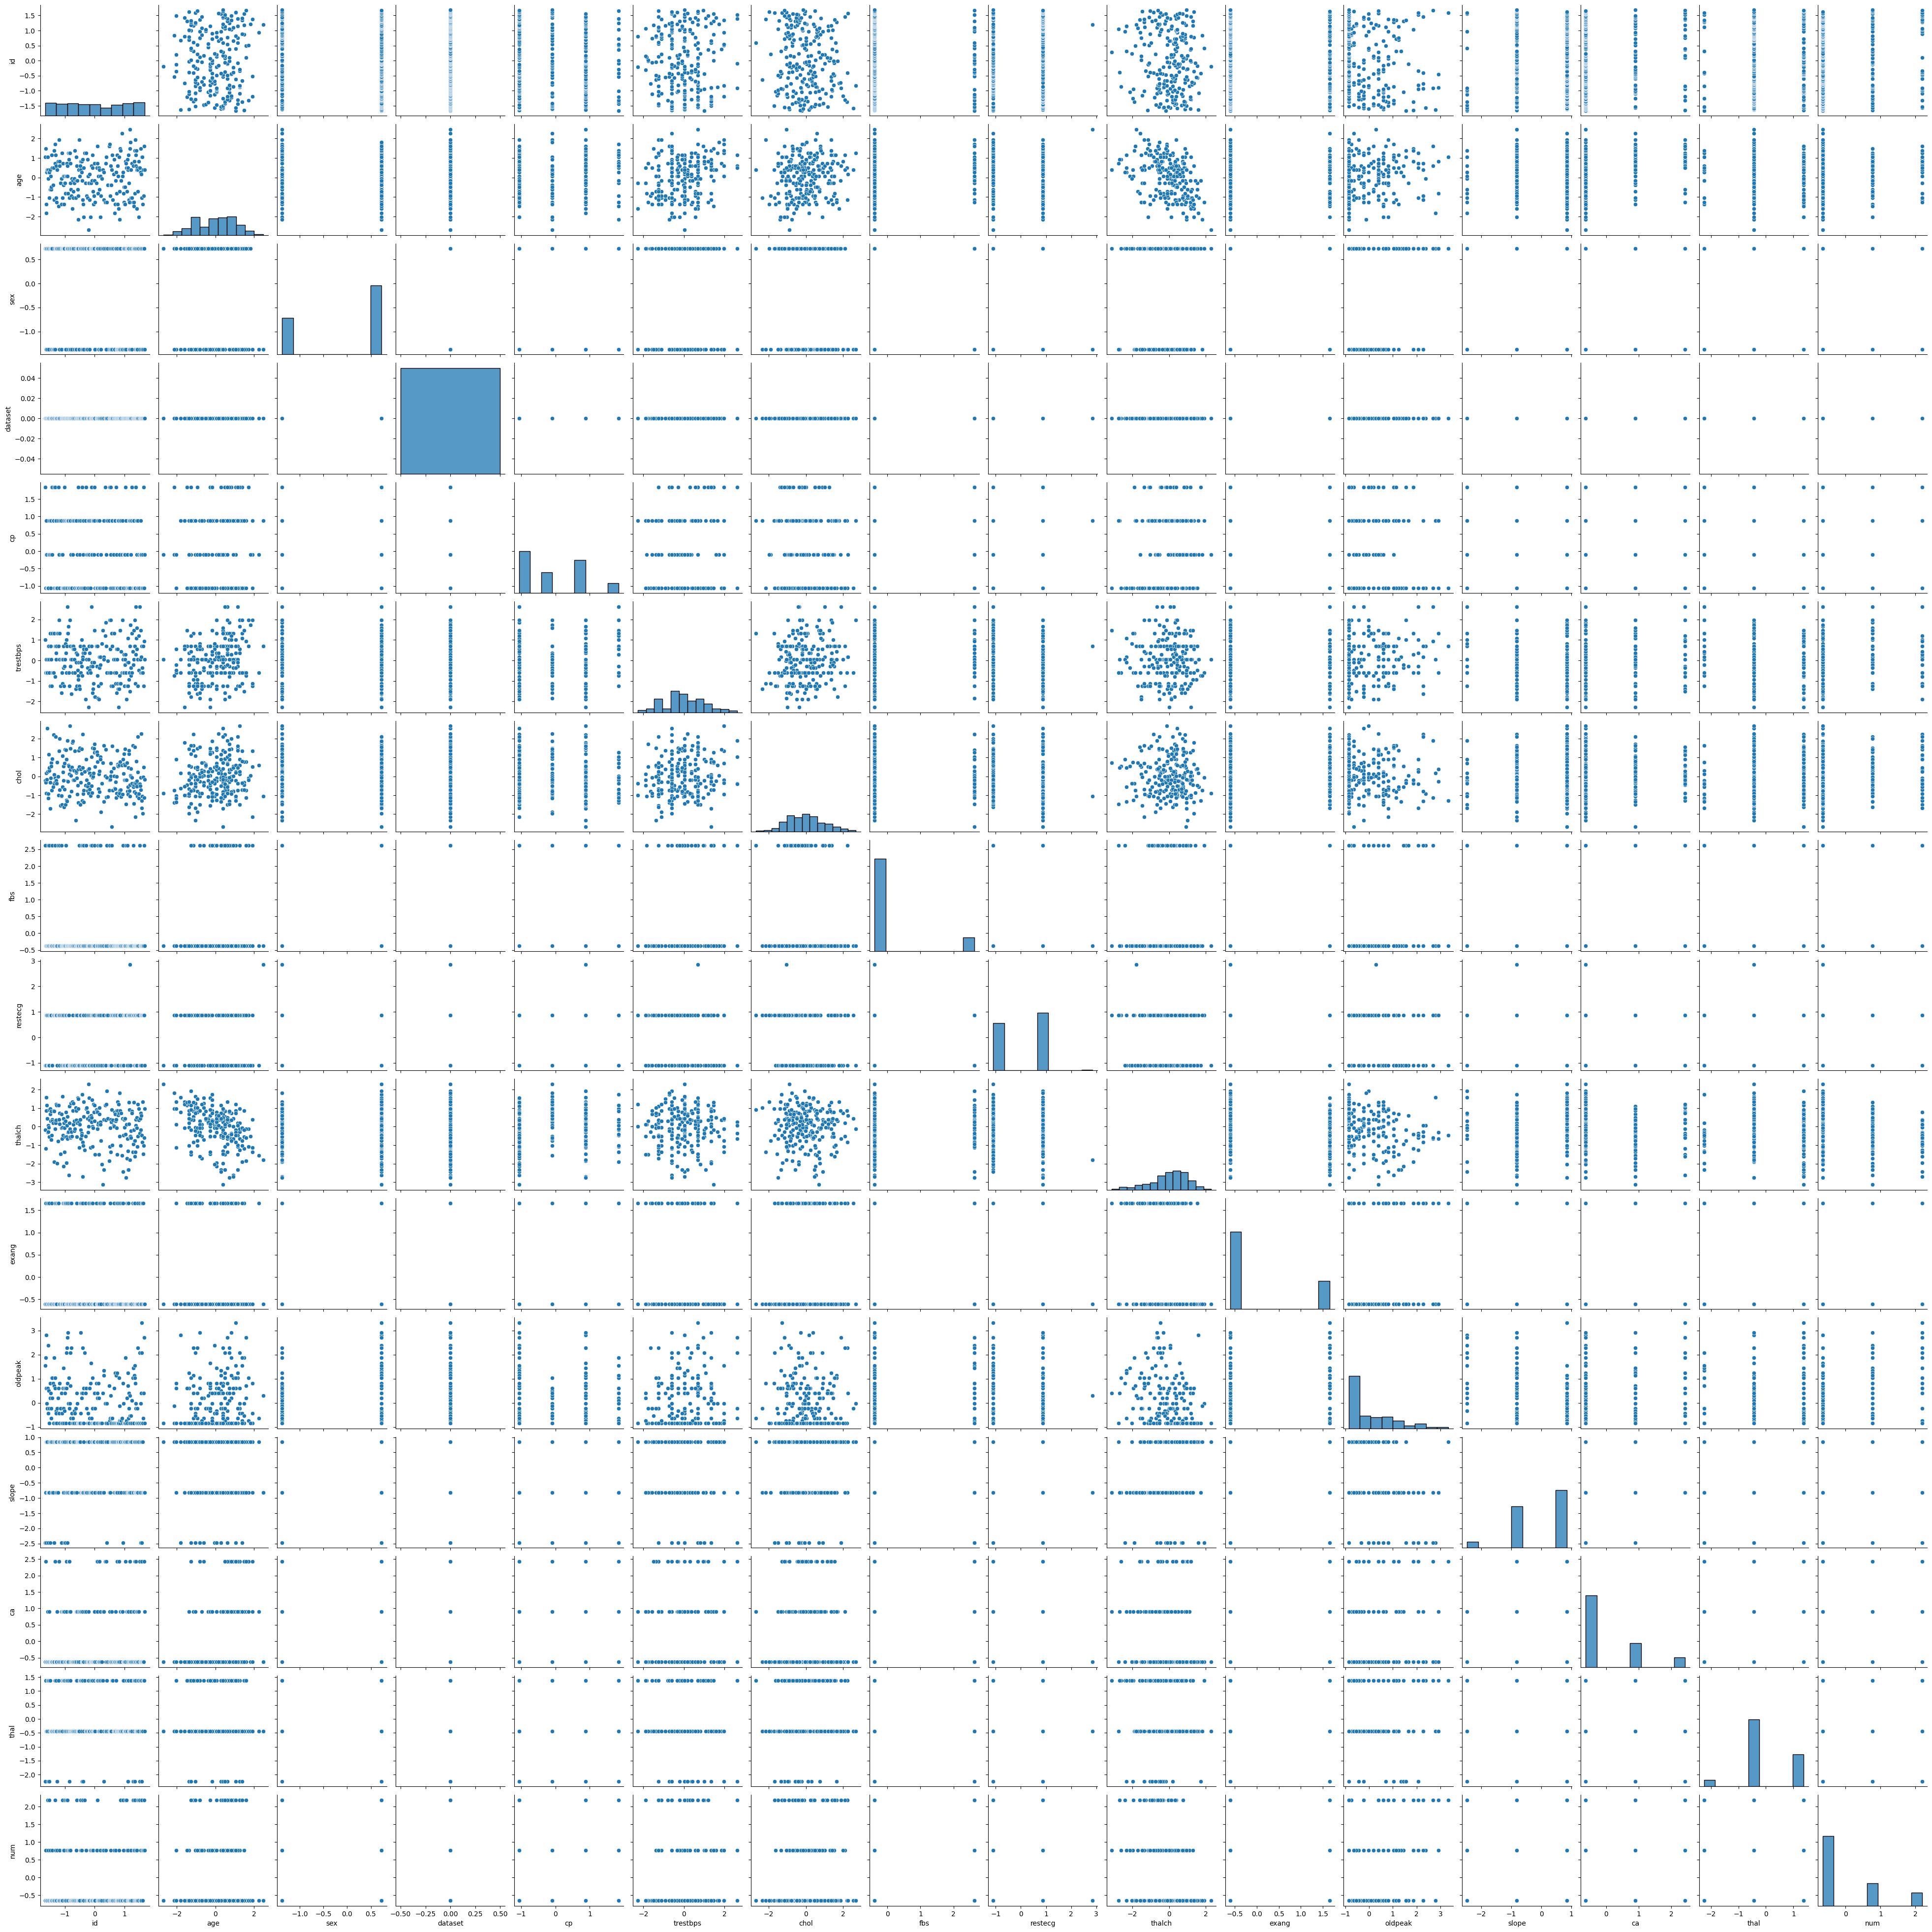

In [70]:
# 2. Scatter plots
sns.pairplot(df)
plt.show()

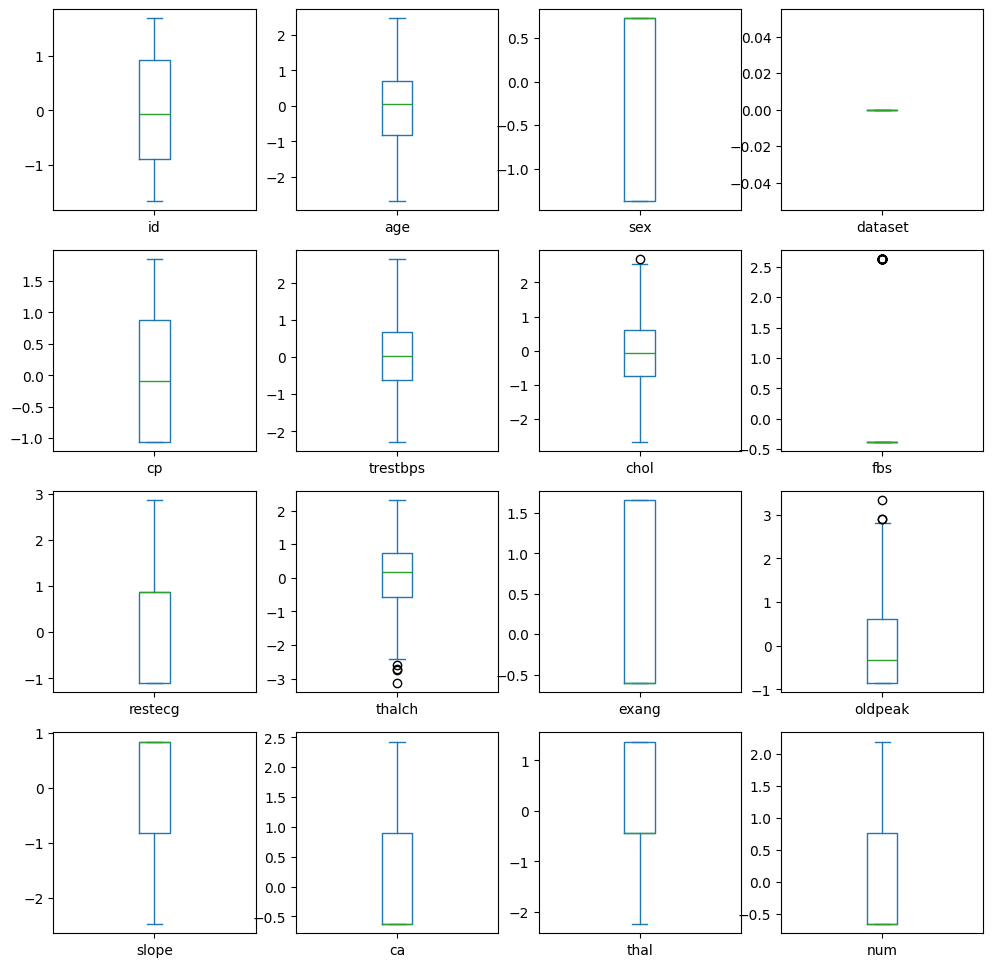

In [71]:
# 3. Box plots
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.show()

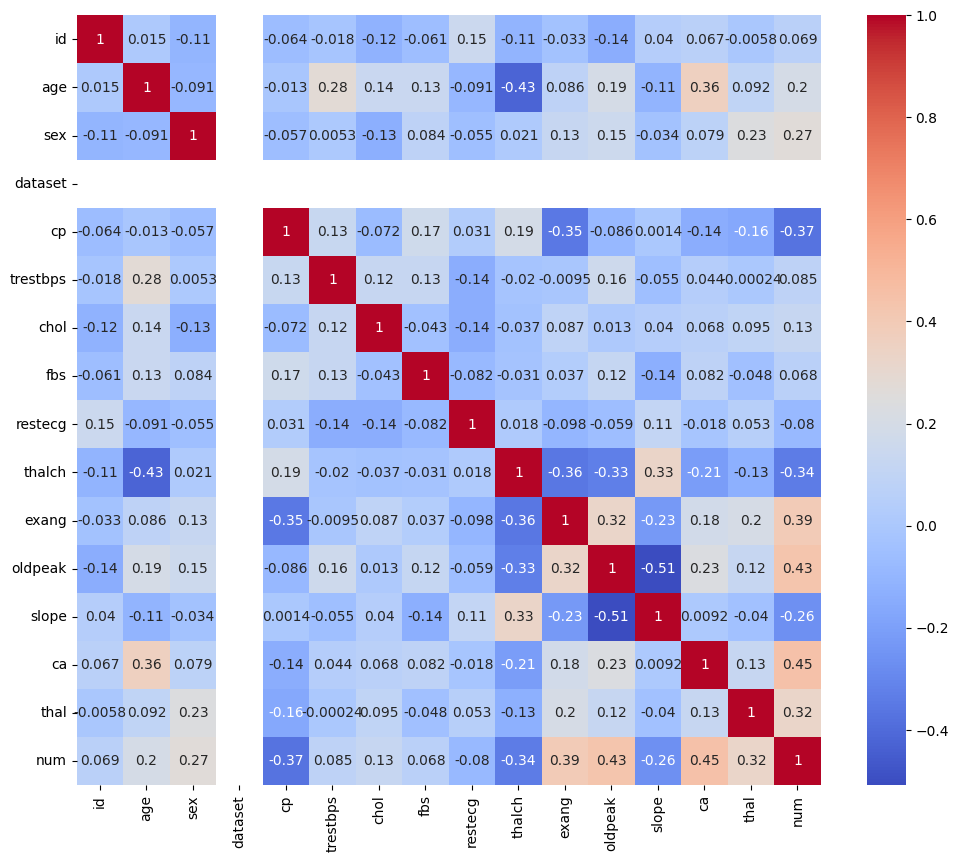

In [72]:
# Correlation matrix and heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Descriptive Statistics

In [73]:
# 1. Summary statistics
print("Summary statistics:\n", df.describe())

Summary statistics:
                id           age           sex  dataset            cp  \
count  228.000000  2.280000e+02  2.280000e+02    228.0  2.280000e+02   
mean     0.000000  7.401487e-17  7.011935e-17      0.0 -3.895519e-18   
std      1.002200  1.002200e+00  1.002200e+00      0.0  1.002200e+00   
min     -1.661310 -2.687002e+00 -1.373345e+00      0.0 -1.060198e+00   
25%     -0.886103 -8.215498e-01 -1.373345e+00      0.0 -1.060198e+00   
50%     -0.066441  5.631009e-02  7.281493e-01      0.0 -9.329743e-02   
75%      0.931047  7.147050e-01  7.281493e-01      0.0  8.736032e-01   
max      1.684025  2.470425e+00  7.281493e-01      0.0  1.840504e+00   

           trestbps          chol           fbs     restecg        thalch  \
count  2.280000e+02  2.280000e+02  2.280000e+02  228.000000  2.280000e+02   
mean  -2.142536e-16  3.505967e-17 -5.843279e-17    0.000000 -3.505967e-16   
std    1.002200e+00  1.002200e+00  1.002200e+00    1.002200  1.002200e+00   
min   -2.286187e+00 -2

In [74]:
# 2. Skewness and kurtosis
print("Skewness:\n", df.skew())
print("Kurtosis:\n", df.kurt())

Skewness:
 id          0.042654
age        -0.134060
sex        -0.649476
dataset     0.000000
cp          0.308102
trestbps    0.241428
chol        0.256912
fbs         2.252658
restecg    -0.128442
thalch     -0.640197
exang       1.057194
oldpeak     1.147740
slope      -0.750337
ca          1.327371
thal        0.034853
num         1.209121
dtype: float64
Kurtosis:
 id         -1.296588
age        -0.630151
sex        -1.592225
dataset     0.000000
cp         -1.258688
trestbps   -0.224771
chol       -0.261015
fbs         3.101600
restecg    -1.737467
thalch      0.214328
exang      -0.890228
oldpeak     0.585905
slope      -0.403222
ca          0.512347
thal       -0.327393
num         0.049825
dtype: float64


# Outlier Detection

In [75]:
# 1. Identify potential outliers
potential_outliers = {}
for col in df.columns:
    if df[col].dtype != 'object':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            potential_outliers[col] = outliers

print("Potential outliers detected in the following columns:\n", potential_outliers.keys())

Potential outliers detected in the following columns:
 dict_keys(['chol', 'fbs', 'thalch', 'oldpeak'])


# Decide on appropriate strategies for handling outliers

In [76]:
# Convert dict_keys to list
potential_outliers_list = list(potential_outliers.keys())

# Apply the transformation methods
for col in potential_outliers_list:

    # Winsorization
    df.loc[potential_outliers[col].index, col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

    # Log transformation
    df[col] = df[col].apply(lambda x: np.log(x) if x > 0 else x)

    # Robust scaling
    from sklearn.preprocessing import RobustScaler
    robust_scaler = RobustScaler()
    df[potential_outliers_list] = robust_scaler.fit_transform(df[potential_outliers_list])

In [77]:
# Remove outliers
for col, outliers in potential_outliers.items():
    if not outliers.index.isin(df.index).all():
        print(f"Skipping removal of outliers in column '{col}' as some outliers are not present in the DataFrame.")
    else:
        df = df.drop(outliers.index)

Skipping removal of outliers in column 'thalch' as some outliers are not present in the DataFrame.
